> ### Create Datacube object
> `dc` in the code below is your window to the datacube data. Retreival and exploration of datacube data happens through this datacube object.  

In [1]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf')

>### Browse the data that's available on your datacube platform    
> You might want to learn more about what data is stored and how it is stored on the datacube. The following code should display a stylish manifest of the data that exists on your system.  


In [2]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']

netCDF_products

,name,description,time,platform,lat,product_type,format,lon,instrument,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
11,alos2_palsar_vietnam,ALOS2 PALSAR tile in DN format processed for t...,None,ALOS_2,None,gamma0,NetCDF,None,PALSAR,EPSG:4326,"[-0.000222222222222, 0.000222222222222]","[0.666666666666, 0.666666666666]","(latitude, longitude)"
12,alos_palsar_vietnam,ALOS PALSAR tile in DN format processed for th...,None,ALOS,None,gamma0,NetCDF,None,PALSAR,EPSG:4326,"[-0.000222222222222, 0.000222222222222]","[0.666666666666, 0.666666666666]","(latitude, longitude)"
14,gpm_imerg_gis_daily_global,Global NetCDF GPM IMERG GIS data,None,GPM,None,daily,NetCDF,None,GPM,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"
15,gpm_imerg_gis_monthly_global,Global NetCDF GPM IMERG GIS data,None,GPM,None,monthly,NetCDF,None,GPM,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"
17,ls5_ledaps_bangladesh,Landsat 5 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_5,None,LEDAPS,NetCDF,None,TM,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"
18,ls5_ledaps_lake_chad_full,Landsat 5 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_5,None,LEDAPS,NetCDF,None,TM,EPSG:4326,"[-0.000271152, 0.00027769]","[0.813456, 0.83307]","(latitude, longitude)"
19,ls7_ledaps_amazon_river,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_7,None,LEDAPS,NetCDF,None,ETM,EPSG:4326,"[-0.000271302, 0.000269995]","[0.813906, 0.809985]","(latitude, longitude)"
20,ls7_ledaps_bangladesh,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_7,None,LEDAPS,NetCDF,None,ETM,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"
35,ls7_ledaps_bangladesh_bari,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_7,None,LEDAPS,NetCDF,None,ETM,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"


>### Pick a product  
>Your cube doesn't store ALL data in existence(Yet). In this tutorial we've only ingested small regions  .  Identify products of interest and explore how much of that data exists on your datacube.  The data_access_api utility will give you lat, lon, and time bounds of your ingestion.   

In [3]:
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi(config = '/home/localuser/.datacube.conf')

platform = "LANDSAT_7"

###########        Our Choice         ###########
product = "ls7_ledaps_colombia"  
# product = "ls7_ledaps_ghana"  
# product = "ls7_ledaps_vietnam"


###########       Get Coordinates    ############
coordinates = api.get_full_dataset_extent(platform = platform, product = product)

> #### Display Lat-Lon and Time Bounds

In [4]:
latitude_extents = ( 
    min(coordinates['latitude'].values),  
    max(coordinates['latitude'].values)
       )

print( latitude_extents )

(-0.94618316250000012, 2.4022878314999998)


In [5]:
longitude_extents = ( 
    min(coordinates['longitude'].values),  
    max(coordinates['longitude'].values)
       )

print( longitude_extents )

(-76.517724847500006, -74.045824987500012)


In [6]:
time_extents = (
    min(coordinates['time'].values),  
    max(coordinates['time'].values))

print( time_extents )

(numpy.datetime64('2000-01-03T15:06:45.000000000'), numpy.datetime64('2015-12-14T15:15:06.000000000'))


# Visualize Data Cube Region

In [7]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> #### Picking a smaller analysis region

In [8]:
# ######### Colombia - Cartegena ##################
longitude_extents = (-74.86272147522804, -74.82286238285974)
latitude_extents = (1.326481586145379, 1.356909851914352)
# time_extents = ('2012-01-01', '2013-01-01')

######## Ghana ##################
# longitude_extents = (  -2.2622,  -2.2039)
# latitude_extents = (8.2390, 8.2867) 

#latitude_extents = (8.2631, 8.2834)
#longitude_extents = (-2.2486, -2.2229)

# longitude_extents = (-2.4026, -2.3484)
# latitude_extents = ( 8.1386,  8.1872)

######### Vietnam ################## 
# longitude_extents = (105.4401, 105.4829)
# latitude_extents  = (11.9733 , 12.0070)



In [9]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

In [10]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

In [11]:
landsat_dataset

<xarray.Dataset>
Dimensions:    (latitude: 113, longitude: 149, time: 152)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-20T15:06:11 2000-04-08T15:05:56 ...
  * latitude   (latitude) float64 1.357 1.357 1.356 1.356 1.356 1.356 1.355 ...
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 -74.86 -74.86 -74.86 ...
Data variables:
    red        (time, latitude, longitude) int16 973 992 993 1106 1259 1126 ...
    green      (time, latitude, longitude) int16 915 937 937 1066 1152 1023 ...
    blue       (time, latitude, longitude) int16 680 700 680 801 901 782 701 ...
    nir        (time, latitude, longitude) int16 2724 2682 2601 2682 2803 ...
    swir1      (time, latitude, longitude) int16 3032 3173 3008 2984 3125 ...
    swir2      (time, latitude, longitude) int16 1601 1751 1626 1651 1926 ...
    pixel_qa   (time, latitude, longitude) int32 66 66 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:4326

# Display Example Images  

>#### Single band visualization   
> For the sake of some quick inspection, let's take a look at two images in the NIR band. We'll mask clouds with bright red.
> You can also view other bands (red, blue, green, swir1, swir2) by replacing the "nir" parameter below

In [12]:
acquisition_number = 4
#increment to cycle through acquisitions

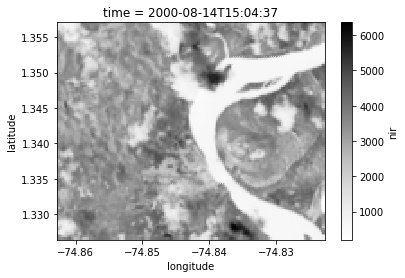

In [13]:
%matplotlib inline
landsat_dataset.nir.isel(time = acquisition_number).plot(cmap = "Greys")

>#### Define Cloud Masking Function   
Removes clouds and cloud shadows

In [14]:
import numpy as np  

def generate_cloud_mask(dataset, include_shadows = False):
    #Create boolean Masks for clear and water pixels
    clear_pixels = dataset.pixel_qa.values == 2  + 64
    water_pixels = dataset.pixel_qa.values == 4  + 64
    shadow_pixels= dataset.pixel_qa.values == 8 + 64
    
    a_clean_mask = np.logical_or(clear_pixels, water_pixels)
    
    if include_shadows:
        a_clean_mask = np.logical_or(a_clean_mask, shadow_pixels)
        
    return np.invert(a_clean_mask)

def remove_clouds(dataset, include_shadows = False):
    #Create boolean Masks for clear and water pixels
    clear_pixels = dataset.pixel_qa.values == 2  + 64
    water_pixels = dataset.pixel_qa.values == 4  + 64
    shadow_pixels= dataset.pixel_qa.values == 8 + 64
    
    a_clean_mask = np.logical_or(clear_pixels, water_pixels)
    
    if include_shadows:
        a_clean_mask = np.logical_or(a_clean_mask, shadow_pixels)
        
    return dataset.where(a_clean_mask)

> #### Mask clouds from first acquisition and plot the clouds (red)

In [15]:
cloud_mask = generate_cloud_mask(landsat_dataset)
cloudless = remove_clouds(landsat_dataset) #landsat_dataset.where(image_is_clean)

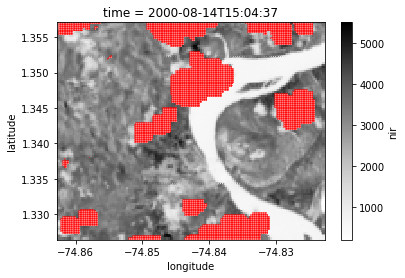

In [16]:
from matplotlib.cm import Greys as red_on_grey
red_on_grey.set_bad('red',.5)

cloudless.isel(time = acquisition_number).nir.plot(cmap = red_on_grey)

> #### False Color Visualizations  
> For the sake of some quick inspection, let's take a look at two RGB images. We'll mask clouds with bright red.

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as color_maps  
from time import time
import numpy as np


def rgb(dataset, at_index = 0, bands = ['red', 'green', 'blue'], paint_on_mask = []):

    rgb = np.stack([dataset[bands[0]], dataset[bands[1]], dataset[bands[2]]], axis = -1)
    max_possible = 3500
    rgb = rgb.astype(np.float32)
    rgb[rgb<0] = 0
    rgb[rgb > max_possible] = max_possible
    rgb *= 255.0/rgb.max()

    rgb = rgb.astype(int)
    rgb = rgb.astype(np.float32)
    rgb = 255-rgb
    
    rgb[rgb > 254] = 254
    rgb[rgb < 1]   = 1
    
    
    for mask, color in paint_on_mask:        
        rgb[mask] = np.array([256,256,256]) - np.array(color).astype(np.int16)
    
    if 'time' in dataset:
        plt.imshow((rgb[at_index]))
    else:
        plt.imshow(rgb)

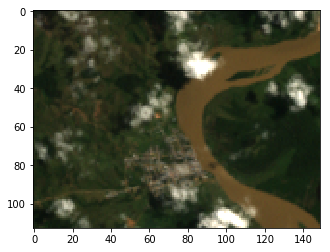

In [18]:

rgb(
    landsat_dataset,
    at_index = 4
    )


In [19]:
red = [255,0,0]

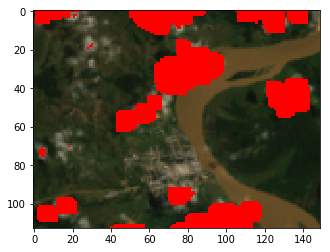

In [20]:

rgb(
    landsat_dataset,
    at_index = 4,
    paint_on_mask = [
        (cloud_mask, red)]
   )



# Cleaning up the clouds, creating cloud free composites of our imagery

>** Most Recent Pixel Mosaic **   
>Masks clouds from imagery and uses the most recent cloud-free pixels.  

In [21]:
from utils.data_cube_utilities.dc_mosaic import create_mosaic

def mrf_mosaic(dataset):
    # The mask here is based on pixel_qa products. It comes bundled in with most Landsat Products.
    cloud_free_boolean_mask = np.invert(generate_cloud_mask(dataset))
    return create_mosaic(dataset, clean_mask = cloud_free_boolean_mask)

In [22]:
recent_composite = mrf_mosaic(landsat_dataset)

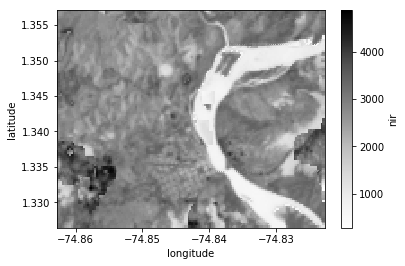

In [23]:
recent_composite.nir.plot(cmap = "Greys")

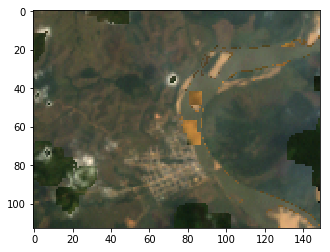

In [24]:
rgb(recent_composite)

----  
> **Median Mosaic**  
>  Masks clouds from imagery using the median valued cloud-free pixels in the time series  

In [25]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic

def median_mosaic(dataset):
    # The mask here is based on pixel_qa products. It comes bundled in with most Landsat Products.
    cloud_free_boolean_mask = np.invert(generate_cloud_mask(dataset))
    return create_median_mosaic(dataset, clean_mask = cloud_free_boolean_mask)

def geo

In [26]:
median_composite = median_mosaic(landsat_dataset)

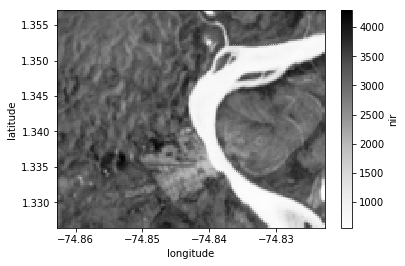

In [27]:
median_composite.nir.plot(cmap = "Greys")

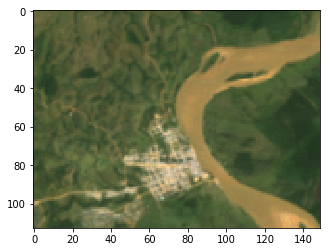

In [28]:
rgb(median_composite)

# Water Detection  
This example uses the Australian Water Detection from Space (WOFS) algorithm for water detection. The base image will use a median composite.  
> 1 <-- Water   
> 0 <-- Not water

In [29]:
from utils.data_cube_utilities.dc_water_classifier import wofs_classify

In [30]:
water_classification = wofs_classify(median_composite, clean_mask = np.ones(median_composite.pixel_qa.shape).astype(np.bool),  mosaic = True) 

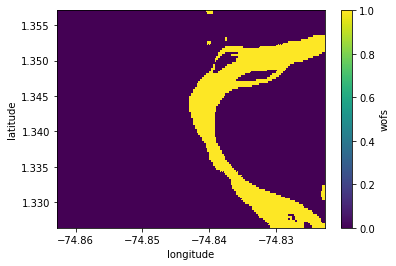

In [31]:
water_classification.wofs.plot()

# Fractional Cover  

Fractional Cover (FC) is used for landcover type estimation (vegetation, non-green vegetation, bare soil) of each pixel. We use a model from CSIRO (Juan Gerschmann) and apply it to a median mosaic.  Read more [here](http://data.auscover.org.au/xwiki/bin/view/Product+pages/Landsat+Fractional+Cover)  

In [32]:
from utils.data_cube_utilities.dc_fractional_coverage_classifier import frac_coverage_classify  

In [33]:
frac_classes = frac_coverage_classify(median_composite, clean_mask = np.ones(median_composite.pixel_qa.shape).astype(np.bool)) 

In [34]:
frac_classes

<xarray.Dataset>
Dimensions:    (latitude: 113, longitude: 149)
Coordinates:
  * latitude   (latitude) float64 1.357 1.357 1.356 1.356 1.356 1.356 1.355 ...
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 -74.86 -74.86 -74.86 ...
Data variables:
    bs         (latitude, longitude) float32 5.0 3.0 4.0 5.0 5.0 6.0 5.0 6.0 ...
    pv         (latitude, longitude) float32 61.0 62.0 65.0 66.0 69.0 70.0 ...
    npv        (latitude, longitude) float32 33.0 33.0 30.0 28.0 24.0 23.0 ...

## Plotting Fractional Cover Results
Plot Bare Soil (bs), Photosynthetic Vegetation (pv) and Non Photosynthetic Vegetation (npv)
Plot a False Color RGB result where RGB = bs/pv/npv.

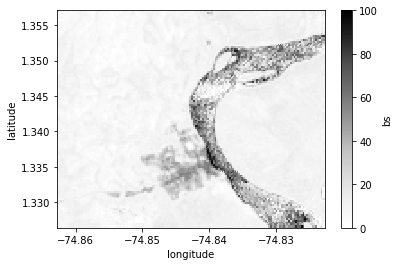

In [35]:
frac_classes.bs.plot(cmap = "Greys")

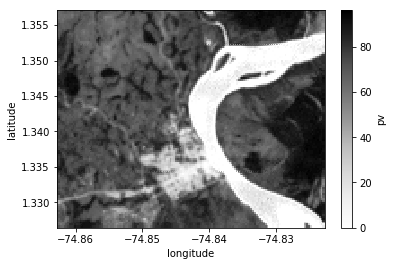

In [36]:
frac_classes.pv.plot(cmap = "Greys")

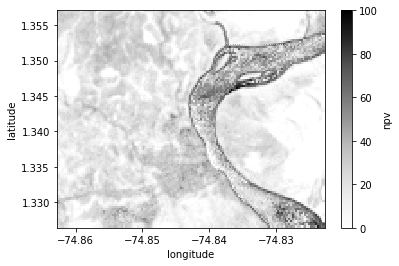

In [37]:
frac_classes.npv.plot(cmap = "Greys")

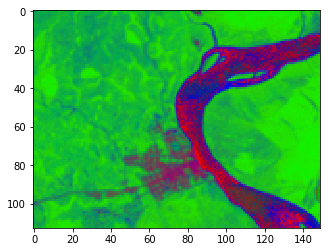

In [38]:
rgb(frac_classes, bands = ['bs', 'pv', 'npv']) 

> ### RGB Color Scale where RGB = bs/pv/npv  

<img src = "diagrams/fractional_cover/frac_cover.PNG" width = 200px style = "float: left;">

-----------------

# Spectral Indices
NDVI (vegetation), NDWI (water), and NDBI (urbanization)

> **NDVI(Normalized Difference Vegetation Index**  
> A derived index that correlates well with the existance of vegetation.  

$$ NDVI =  \frac{(NIR - RED)}{(NIR + RED)}$$  

In [39]:
def NDVI(dataset):
    return (dataset.nir - dataset.red)/(dataset.nir + dataset.red)

> ** NDWI Normalized Difference Water Index **  
> A derived index that correlates well with the existance of water.  
<br>

$$ NDWI =  \frac{GREEN - NIR}{GREEN + NIR}$$  

In [40]:
def NDWI(dataset):
    return (dataset.green - dataset.nir)/(dataset.green + dataset.nir)

> ** NDBI Normalized Difference Build-Up Index **  
> A derived index that correlates well with the existance of urbanization.  
<br>
  
$$NDBI =  \frac{(SWIR - NIR)}{(SWIR + NIR)}$$  

In [41]:
def NDBI(dataset):
        return (dataset.swir2 - dataset.nir)/(dataset.swir2 + dataset.nir)

> #### Evaluating all three indices on a median mosaic  


In [42]:
landsat_mosaic = median_mosaic(landsat_dataset)  

ndbi = NDBI(landsat_mosaic)  # Urbanization - Reds
ndvi = NDVI(landsat_mosaic)  # Dense Vegetation - Greens
ndwi = NDWI(landsat_mosaic)  # High Concentrations of Water - Blues  

<br>  


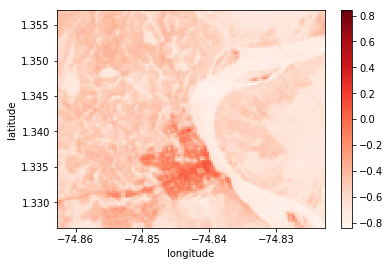

In [43]:
(ndbi).plot(cmap = "Reds")

<br>  

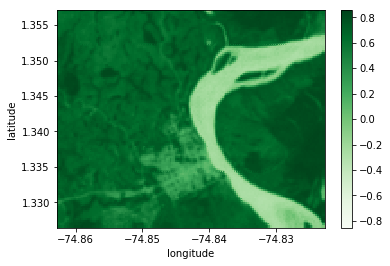

In [44]:
(ndvi).plot(cmap = "Greens")

<br>  

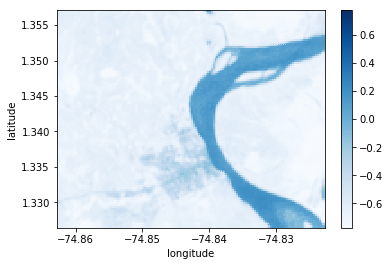

In [45]:
(ndwi).plot(cmap = "Blues")

> **Merge into one large Dataset **  
> If your data-arrays share the same set of coordinates, or if you feel that you'll be using these values together in the future,  you should consider merging them into a dataset  


In [46]:
ds_ndvi = ndvi.to_dataset(name = "NDVI")
ds_ndwi = ndwi.to_dataset(name=  "NDWI")
ds_ndbi = ndbi.to_dataset(name = "NDBI")

urbanization_dataset = ds_ndvi.merge(ds_ndwi).merge(ds_ndbi)

> #### Check Structure of our new urbanization dataset   

In [47]:
# urbanization_dataset  
# outputs the data array content and dimensions

> #### Display False Color Composite  
Where RGB = NDBI / NDVI / NDWI (Urbanization / Vegetation / Water)

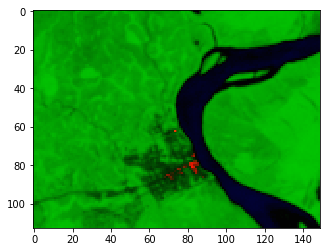

In [48]:
urbanization_dataset.NDBI.values *= 8 # Scale NDBI for visual purposes 
rgb(urbanization_dataset, bands = ['NDBI', 'NDVI', 'NDWI'])  

# TSM  
TSM = Total Suspended Matter. This parameter is a measure of the particulate matter in water and is often a proxy for water quality.

In [49]:
from utils.data_cube_utilities.dc_water_quality import tsm

In [50]:
mask_that_only_includes_water_pixels = water_classification.wofs == 1  
tsm_dataset = tsm(median_composite, clean_mask = mask_that_only_includes_water_pixels )

In [51]:
# print( tsm_dataset )
# outputs the data array dimensions and content

> ### Plot TSM Results
The TSM value is the mean over the entire time range

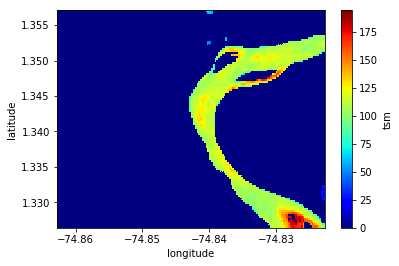

In [52]:
tsm_dataset.tsm.plot(cmap = "jet")

--------------------- 

# Time Series Cloud Cover Analysis
Calculates the average cloud coverage percentages for the analysis area for each time step 

In [53]:
import numpy as np 

def dataset_cloud_percentage_time_series(dataset):
    
    ## Creates an array of True and False Values
    mask = np.logical_or(
        dataset.pixel_qa == 64 + 2,
        dataset.pixel_qa == 64 + 4
    )
    
    mask = np.logical_or(
        mask,
        dataset.pixel_qa == 64 + 8
    )
    
    mask = np.invert(mask)
    mask = mask.astype(np.int16)  ## True/False ----> 1/0  
    cloud_coverage = mask.mean(dim = ['latitude', 'longitude']) ## Find average value(between 1 and 0) per time slice. Treat as percentage
    return (cloud_coverage * 100).rename("cloud_coverage_percentage")

In [54]:
time_series = dataset_cloud_percentage_time_series(landsat_dataset)

In [55]:
# time_series
# outputs the data array content

(array([ 10.,  33.,  16.,   8.,   7.,   3.,   9.,   4.,  11.,  51.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

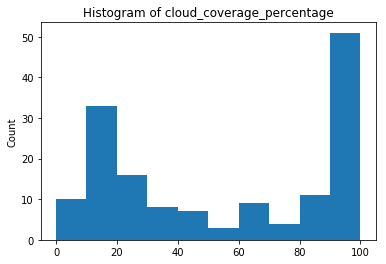

In [56]:
time_series.plot.hist()

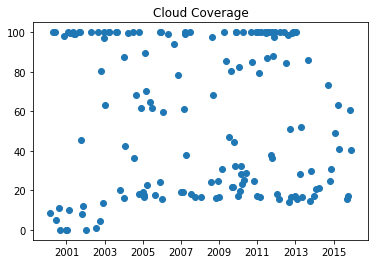

In [57]:
import matplotlib.pyplot as plt

times = time_series.time.values
values = time_series.values

plt.title('Cloud Coverage')
plt.scatter(times, values)

> # Time Series Water Detection Analysis
Time series output of the Australian Water Detection from Space(WOFS) results. The results show the percent of time that a pixel is classified as water over the entire time series. BLUE = frequent water, RED = infrequent water.

In [102]:
water_classification = wofs_classify(landsat_dataset,
                                     clean_mask = np.invert(cloud_mask)) 

In [103]:
# Apply nan to no_data values
water_classification = water_classification.where(water_classification != -9999)

##Time series aggregation that ignores nan values.    
water_classification_percentages = (water_classification.mean(dim = ['time']) * 100).wofs.rename('water_classification_percentages')

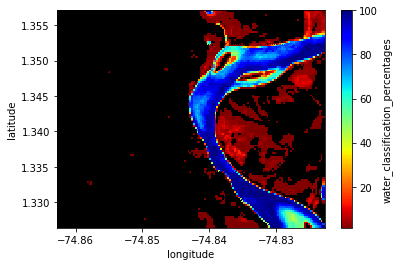

In [104]:
## import color-scheme and set nans to black
from matplotlib.cm import jet_r as jet_r
jet_r.set_bad('black',1)

## apply nan to percentage values that aren't greater than 0, then plot
water_classification_percentages\
    .where(water_classification_percentages > 0)\
    .plot(cmap = jet_r)